## Identifying Duplicate Questions

Over 100 million people visit Quora every month, so it's no surprise that many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and results in members answering multiple versions of the same question. Quora uses random forest to identify duplicated questions to provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
Follow the steps outlined below to build the appropriate classifier model. 


Steps:
- Download data
- Exploration
- Cleaning
- Feature Engineering
- Modeling

By the end of this project you should have **a presentation that describes the model you built** and its **performance**. 


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("train.csv")

#### Note
There is no designated test.csv file. The train.csv file is the entire dataset. Part of the data in the train.csv file should be set aside to act as the final testing data.

In [27]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


### Exploration

In [28]:
df.shape

(404290, 6)

In [29]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

There are:
* 1 row with null values in Question 1
* 2 rows with null values in Question 2

In [30]:
df.dropna(inplace=True)

In [31]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [32]:
# check for repeated pair of questions
pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions:",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions: 0


In [33]:
df.duplicated().sum()

0

In [7]:
df.loc[(df['is_duplicate'] == 0)].head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
df.loc[(df['is_duplicate'] == 1)].head()

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


In [34]:
df['is_duplicate'].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

<AxesSubplot: xlabel='is_duplicate'>

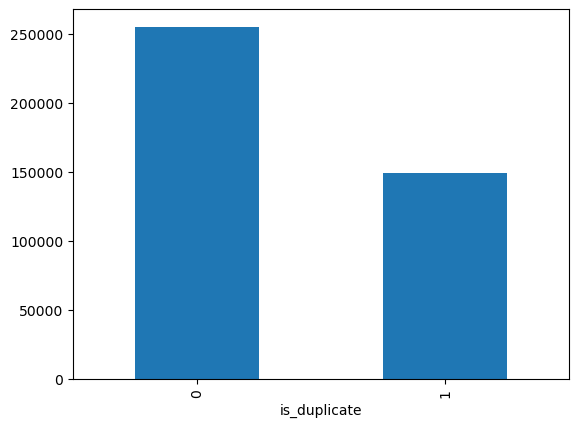

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df.groupby("is_duplicate")['id'].count().plot.bar()

In [36]:
# ratio of non-duplicated questions

round(255024/len(df)*100, 2)

63.08

- 63% of the questions are not duplicated.
- 37% of the questions are duplicated.

In [37]:
# repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions:', np.unique(qid).shape[0])

unique_q = len(np.unique(qid))
               
qidrepeat = qid.value_counts()>1
print('Number of repeated questions:', qidrepeat[qidrepeat].shape[0])
print ('Max number of times a single question is repeated: {}\n'.format(max(qid.value_counts()))) 


Number of unique questions: 537929
Number of repeated questions: 111778
Max number of times a single question is repeated: 157



In [181]:
# x = ["unique_questions" , "repeated_questions"]
# y = [unique_q, qidrepeat]

# plt.figure(figsize=(10, 6))
# plt.title ("Unique and repeated questions")
# sns.barplot(x,y)
# plt.show()


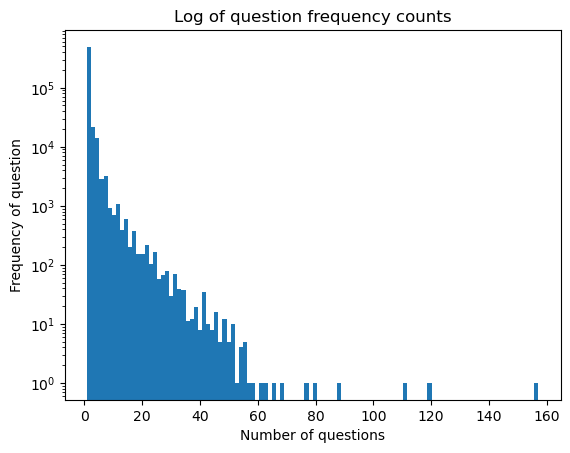

In [38]:
# number of occurrences of each question

plt.hist(qid.value_counts().values, bins=110)
plt.yscale('log')
plt.title("Log of question frequency counts")
plt.xlabel("Number of questions")
plt.ylabel("Frequency of question")
plt.show()

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer



In [39]:
from sklearn.metrics import log_loss

p = df['is_duplicate'].mean() # our predicted probability
print('predicted score:',log_loss(df['is_duplicate'], np.zeros_like(df['is_duplicate']) + p))

predicted score: 0.658528851473067


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [40]:
# drop unnecessary columns
df.drop(["id", "qid1", "qid2"], axis = 1, inplace=True)

In [41]:
df.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### Basic Feature Extraction -- Incomplete

In [22]:
# # Length of Question Pairs
# df['len_q1'] = df['question1'].apply(lambda x : len(str(x)))
# df['len_q2'] = df['question2'].apply(lambda x : len(str(x)))

# # # Frequency
# # df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count')
# # df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
# # df.drop(labels=['freq_qid1', 'freq_qid2'], axis=1, inplace=True)

# # Number of Words in Question Pairs
# df['n_words_q1'] = df['question1'].apply(lambda x : len(str(x).split(' ')))
# df['n_words_q2'] = df['question2'].apply(lambda x : len(str(x).split(' ')))

# # Number of Common words in Question Pairs
# def normalized_word_common(example):
#     q1_str = str(example['question1'])
#     q2_str = str(example['question2'])
    
#     w1 = set(map(lambda text : text.lower().strip(), q1_str.split(' ')))
#     w2 = set(map(lambda text : text.lower().strip(), q2_str.split(' ')))
#     return 1.0 * len(w1 & w2)

# df['num_common_words_q1q2'] = df.apply(normalized_word_common, axis=1)

# # Total number of words in Question Pairs
# def normalized_word_total(example):
#     q1_str = str(example['question1'])
#     q2_str = str(example['question2'])
             
#     w1 = set(map(lambda text : text.strip().strip(), q1_str.split(' ')))
#     w2 = set(map(lambda text : text.strip().strip(), q2_str.split(' ')))
    
#     return 1.0 * (len(w1) + len(w2))

# df['num_total_words_q1q2'] = df.apply(normalized_word_total, axis=1)

# # word_share = (num_common_words_q1q2 / num_total_words_q1q2)
# def normalized_word_share(example):
#     q1_str = str(example['question1'])
#     q2_str = str(example['question2'])
    
#     w1 = set(map(lambda text : text.strip().strip(), q1_str.split(' ')))
#     w2 = set(map(lambda text : text.strip().strip(), q2_str.split(' ')))
    
#     return 1.0 * (len(w1 & w2)/(len(w1) + len(w2)))

# df['word_share'] = df.apply(normalized_word_share, axis=1)
# df.head()

### Text Preprocessing (Cleaning)

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

### 1. Remove punctuation

In [42]:
# What punctuation is included?
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
df.isnull().sum()

question1       0
question2       0
is_duplicate    0
dtype: int64

In [44]:
# Define a function to remove punctuation in our messages
def remove_punct(text):
    try:
        text = "".join([char for char in text if char not in string.punctuation])
    except:
        print(text)
    return text

In [45]:
df['question1_clean'] = df['question1'].apply(lambda x: remove_punct(x))
df['question2_clean'] = df['question2'].apply(lambda x: remove_punct(x))

df.head(10)

,question1,question2,is_duplicate,question1_clean,question2_clean
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor KohiNoor Diamond,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely How can I solve it,Find the remainder when math2324math is divide...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,Which one dissolve in water quikly sugar salt ...,Which fish would survive in salt water
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,Astrology I am a Capricorn Sun Cap moon and ca...,Im a triple Capricorn Sun Moon and ascendant i...
6,Should I buy tiago?,What keeps childern active and far from phone ...,0,Should I buy tiago,What keeps childern active and far from phone ...
7,How can I be a good geologist?,What should I do to be a great geologist?,1,How can I be a good geologist,What should I do to be a great geologist
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,When do you use シ instead of し,When do you use instead of and
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,Motorola company Can I hack my Charter Motorol...,How do I hack Motorola DCX3400 for free internet


### 2. Tokenization (and lowercase)

In [46]:
# Define a function to split our sentences into a list of words
# ['Define', 'a', 'function', ...]

#import regular expression
import re

def tokenize(text):
    tokens = text.lower().split()
    
    return tokens

df['question1_tokenized'] = df['question1_clean'].apply(lambda x: tokenize(str(x)))
df['question2_tokenized'] = df['question2_clean'].apply(lambda x: tokenize(str(x)))

df.head()

,question1,question2,is_duplicate,question1_clean,question2_clean,question1_tokenized,question2_tokenized
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv..."
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor KohiNoor Diamond,What would happen if the Indian government sto...,"[what, is, the, story, of, kohinoor, kohinoor,...","[what, would, happen, if, the, indian, governm..."
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,..."
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely How can I solve it,Find the remainder when math2324math is divide...,"[why, am, i, mentally, very, lonely, how, can,...","[find, the, remainder, when, math2324math, is,..."
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,Which one dissolve in water quikly sugar salt ...,Which fish would survive in salt water,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water]"


### 3. Stopwords Cleaning

In [47]:
# Import the NLTK package and download the necessary data
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# view the stopwords
# stopwords.words()

#just want the English stop words
ENGstopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vivien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
# Define a function to remove all stopwords
def remove_stopwords(tokenized_text):    
    text = [word for word in tokenized_text if word not in ENGstopwords]
    return text

df['question1_nostop'] = df['question1_tokenized'].apply(lambda x: remove_stopwords(x))
df['question2_nostop'] = df['question2_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

,question1,question2,is_duplicate,question1_clean,question2_clean,question1_tokenized,question2_tokenized,question1_nostop,question2_nostop
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv...","[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]"
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor KohiNoor Diamond,What would happen if the Indian government sto...,"[what, is, the, story, of, kohinoor, kohinoor,...","[what, would, happen, if, the, indian, governm...","[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, stole, koh..."
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,...","[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]"
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely How can I solve it,Find the remainder when math2324math is divide...,"[why, am, i, mentally, very, lonely, how, can,...","[find, the, remainder, when, math2324math, is,...","[mentally, lonely, solve]","[find, remainder, math2324math, divided, 2423]"
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,Which one dissolve in water quikly sugar salt ...,Which fish would survive in salt water,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water]","[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]"


### 4. Stemming

In [49]:
# importing modules 
nltk.download('punkt')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /Users/vivien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
# create a function that stems text
porter = PorterStemmer()
    
def stem_text(words):
    stemmed = [porter.stem(word) for word in words]
    
    return stemmed

In [51]:
df['question1_stem'] = df['question1_nostop'].apply(lambda x: stem_text(x))
df['question2_stem'] = df['question2_nostop'].apply(lambda x: stem_text(x))

df.head()

,question1,question2,is_duplicate,question1_clean,question2_clean,question1_tokenized,question2_tokenized,question1_nostop,question2_nostop,question1_stem,question2_stem
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv...","[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]","[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]"
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor KohiNoor Diamond,What would happen if the Indian government sto...,"[what, is, the, story, of, kohinoor, kohinoor,...","[what, would, happen, if, the, indian, governm...","[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, stole, koh...","[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoo..."
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,...","[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]","[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dn]"
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely How can I solve it,Find the remainder when math2324math is divide...,"[why, am, i, mentally, very, lonely, how, can,...","[find, the, remainder, when, math2324math, is,...","[mentally, lonely, solve]","[find, remainder, math2324math, divided, 2423]","[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]"
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,Which one dissolve in water quikly sugar salt ...,Which fish would survive in salt water,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water]","[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]","[one, dissolv, water, quikli, sugar, salt, met...","[fish, would, surviv, salt, water]"


### 5. Lemmatization

In [52]:
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/vivien/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/vivien/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [53]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(words):    
    words_lem = [lemmatizer.lemmatize(w) for w in words]
    
    return words_lem

In [54]:
df['question1_lem'] = df['question1_stem'].apply(lambda x: lemmatize_text(x))
df['question2_lem'] = df['question2_stem'].apply(lambda x: lemmatize_text(x))

df.head()

,question1,question2,is_duplicate,question1_clean,question2_clean,question1_tokenized,question2_tokenized,question1_nostop,question2_nostop,question1_stem,question2_stem,question1_lem,question2_lem
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv...","[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]","[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]","[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]"
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,What is the story of Kohinoor KohiNoor Diamond,What would happen if the Indian government sto...,"[what, is, the, story, of, kohinoor, kohinoor,...","[what, would, happen, if, the, indian, governm...","[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, stole, koh...","[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoo...","[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoo..."
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,...","[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]","[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dn]","[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dn]"
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,Why am I mentally very lonely How can I solve it,Find the remainder when math2324math is divide...,"[why, am, i, mentally, very, lonely, how, can,...","[find, the, remainder, when, math2324math, is,...","[mentally, lonely, solve]","[find, remainder, math2324math, divided, 2423]","[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]","[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]"
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,Which one dissolve in water quikly sugar salt ...,Which fish would survive in salt water,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water]","[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]","[one, dissolv, water, quikli, sugar, salt, met...","[fish, would, surviv, salt, water]","[one, dissolv, water, quikli, sugar, salt, met...","[fish, would, surviv, salt, water]"


---

In [55]:
# Define a function 'preprocess' that applies all the preprocessing steps from functions defined above

def preprocess(text):
    text = remove_punct(text)
    tokens = tokenize(text) 
    words = remove_stopwords(tokens)
    words = stem_text(words)
    words = lemmatize_text(words)
    
    return words

In [56]:
df['question1_clean'] = df['question1'].map(preprocess)
df['question2_clean'] = df['question2'].map(preprocess)

df_clean = df[['question1_clean', 'question2_clean', 'is_duplicate', 'len_q1', 'len_q2', 'n_words_q1', 'n_words_q2', 'num_common_words_q1q2', 'num_total_words_q1q2', 'word_share']]
df_clean.head()


KeyError: "['len_q1', 'len_q2', 'n_words_q1', 'n_words_q2', 'num_common_words_q1q2', 'num_total_words_q1q2', 'word_share'] not in index"

In [ ]:
import csv

In [ ]:
df_clean.to_csv("df_cleaned.csv", index=False)

----

### Feature Engineering

- tf-idf *
- word2vec *
- word count
- number of the same words in both questions
- ....

### Text Frequency - Inverse Document Frequency (TF-IDF)

In [2]:
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv('df_cleaned.csv', index_col=False)

In [4]:
df['question1_clean'] = df['question1_clean'].apply(literal_eval)
df['question2_clean'] = df['question2_clean'].apply(literal_eval)
df.head()

,question1_clean,question2_clean,is_duplicate,len_q1,len_q2,n_words_q1,n_words_q2,num_common_words_q1q2,num_total_words_q1q2,word_share
0,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",0,66,57,14,12,10.0,23.0,0.434783
1,"[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoo...",0,51,88,8,13,4.0,20.0,0.200000
2,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dn]",0,73,59,14,10,4.0,24.0,0.125000
3,"[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]",0,50,65,11,9,0.0,19.0,0.000000
4,"[one, dissolv, water, quikli, sugar, salt, met...","[fish, would, surviv, salt, water]",0,76,39,13,7,2.0,20.0,0.100000


In [5]:
# Convenience function
# This function will apply a vectorizer to a series of text
# Will return a dataframe with the results of the vectorizer.
def create_doc_term_matrix(text,vectorizer):
    doc_term_matrix = vectorizer.fit_transform(text)
    return pd.DataFrame(doc_term_matrix.toarray(), columns = vectorizer.get_feature_names_out())

In [6]:
df_q1q2 = df["question1_clean"] + df["question2_clean"]

In [213]:
# tfidf_vec = TfidfVectorizer(max_features=10000)
                                                    
# vec_q1_dense = tfidf_vec_q1.fit_transform(df_q1_vec).todense()

# df_q1_dense = pd.DataFrame(vec_q1_dense, columns = tfidf_vec_q1.get_feature_names_out())

In [214]:
tfidf_vec_q2 = TfidfVectorizer(max_features=10000)

# df_q2_vec = df['question2_clean'].apply(lambda x: " ".join(x))

# vec_q2_dense = tfidf_vec_q2.fit_transform(df_q1_vec).todense()

# df_q2_dense = pd.DataFrame(vec_q2_dense, columns = tfidf_vec_q2.get_feature_names_out())

In [215]:
# df['question1_clean'] = df['question1_clean'].apply(lambda x: " ".join(x))
# df['question2_clean'] = df['question2_clean'].apply(lambda x: " ".join(x))

In [7]:
df_q1q2 = df_q1q2.apply(lambda x: " ".join(x) )

In [217]:
#function that was defined earlier to view TF-IDF result as a DataFrame
df_train_n_5K = create_doc_term_matrix(df_q1q2.apply(lambda x: str(x)), TfidfVectorizer(max_features=5000))
df_train_n_10K = create_doc_term_matrix(df_q1q2.apply(lambda x: str(x)), TfidfVectorizer(max_features=10000))
df_train_n_5K.head()

,10,100,1000,10000,100000,100k,1080p,10k,10th,11,...,yr,zealand,zenfon,zero,zinc,zip,zodiac,zombi,zone,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- LSTMs
- etc

In [17]:
# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import scipy
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

### TDIDF features n=10000

In [219]:
df_train_n_10K.columns

Index(['00', '01', '05', '10', '100', '1000', '10000', '100000', '1000000',
       '1000r',
       ...
       'zoloft', 'zomato', 'zombi', 'zone', 'zoo', 'zoolog', 'zoom',
       'zuckerberg', 'zurich', 'zynga'],
      dtype='object', length=10000)

In [ ]:
X = df_train_n_10K
y = df['is_duplicate']

# Split dataset into Training set and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27, stratify=y)

In [ ]:
%%time 
clf = LogisticRegression()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
C = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {acc}')
print(f'Confusion matrix:\n {C}')

### TDIDF features n=5000

In [ ]:
X = df_train_n_5K
y = df['is_duplicate']

# Split dataset into Training set and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27, stratify=y)

In [ ]:
%%time 
clf = LogisticRegression()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
C = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {acc}')
print(f'Confusion matrix:\n {C}')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {acc}')
print(f'Recall: {rec}')
print(f'f1-score: {f1}')

## TFIDF (all)

In [9]:
# make TfidfVectorizer learn only alphabetical characters as part of the vocabulary (exclude numbers)
tfidf_vect = TfidfVectorizer()

In [10]:
# tfidf_vect.fit(pd.concat([df['question1_clean'],df['question1_clean']]))
df_q1_vec = df['question1_clean'].apply(lambda x: " ".join(x))
df_q2_vec = df['question2_clean'].apply(lambda x: " ".join(x))

In [11]:
trainq1_trans = tfidf_vect.fit_transform(df_q1_vec)
trainq2_trans = tfidf_vect.fit_transform(df_q2_vec)
labels = df['is_duplicate'].values
X = scipy.sparse.hstack((trainq1_trans,trainq2_trans))
y = labels

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [12]:
X.shape

(404287, 121602)

### Logistic Regression

In [60]:
%%time 
clf = LogisticRegression()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
C = confusion_matrix(y_test, y_pred)
# pre = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

preds = clf.predict(X_test)
print("Logistic Regression's prediction accuracy is: %3.2f" % (acc))
print("Accuracy \t{:.3f}".format(metrics.accuracy_score(y_test, preds)))
print('Recall \t\t{:.3f}'.format(metrics.recall_score(y_test, preds, average='binary')))
print('Precision \t{:.3f}'.format(metrics.precision_score(y_test, preds, average='binary')))
print('F1 Score \t{:.3f}'.format(metrics.f1_score(y_test, preds, average='binary')))
print(f'Confusion matrix:\n {C}')

Logistic Regression's prediction accuracy is: 0.75
Accuracy 	0.748
Recall 		0.537
Precision 	0.708
F1 Score 	0.611
Confusion matrix:
 [[66720  9889]
 [20689 23989]]
CPU times: user 2.29 s, sys: 262 ms, total: 2.56 s
Wall time: 2.37 s


### XGBoost

In [19]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'hyperopt'

In [20]:
%%time
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic').fit(X_train, y_train) 

CPU times: user 8min 7s, sys: 24.7 s, total: 8min 32s
Wall time: 1min 9s


In [59]:
preds = xgb_model.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
acc_xgb_proba = xgb_model.predict_proba(X_test)
C = confusion_matrix(y_test, preds)

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Accuracy \t{:.3f}".format(metrics.accuracy_score(y_test, preds)))
print('Recall \t\t{:.3f}'.format(metrics.recall_score(y_test, preds, average='binary')))
print('Precision \t{:.3f}'.format(metrics.precision_score(y_test, preds, average='binary')))
print('F1 Score \t{:.3f}'.format(metrics.f1_score(y_test, preds, average='binary')))
# print('AUC Score \t{:.3f} '.format(metrics.roc_auc_score(y_test, y_rfc_proba, multi_class='ovo')))
print(f'Confusion matrix:\n {C}')

XGBoost's prediction accuracy is: 76.86
Accuracy 	0.769
Recall 		0.503
Precision 	0.793
F1 Score 	0.616
Confusion matrix:
 [[70750  5859]
 [22205 22473]]


In [147]:
# A parameter grid for XGBoost
params = {
    'max_depth': range (2, 5, 1),
    'n_estimators': range(50, 200, 50),
    'learning_rate': [0.1]
}

In [148]:
xgb = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [149]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=params,
    scoring = 'accuracy',
    n_jobs = 5,
    cv = 3,
    verbose=True
)

In [150]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=5,
             param_grid={'learning_rate': [0.1], 'max_depth': range(2, 5),
                         'n_estimators': range(50, 200, 50)},
             scoring='accuracy', verbose=True)

The `best_estimator_` field contains the best model trained by GridSearch.

In [151]:
xgb_model_best = grid_search.best_estimator_

In [152]:
preds = xgb_model_best.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
acc_xgb_proba = xgb_model.predict_proba(X_test)

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Accuracy \t{:.3f}".format(metrics.accuracy_score(y_test, preds)))
print('Recall \t\t{:.3f}'.format(metrics.recall_score(y_test, preds, average='weighted')))
print('Precision \t{:.3f}'.format(metrics.precision_score(y_test, preds, average='weighted')))
print('F1 Score \t{:.3f}'.format(metrics.f1_score(y_test, preds, average='weighted')))
# print('AUC Score \t{:.3f} '.format(metrics.roc_auc_score(y_test, y_rfc_proba, multi_class='ovo')))

XGBoost's prediction accuracy is: 71.24
Accuracy 	0.712
Recall 		0.712
Precision 	0.733
F1 Score 	0.670


In [ ]:
# xgb_model = xgb.XGBClassifier(best_hyperparams)
# xgb_model.fit(X_train, y_train)

### Word2Vec - A Class of Neural Net Vectorizers

In [120]:
# Import the NLTK package and download the necessary data
import nltk
import numpy as np
import pandas as pd
from nltk import word_tokenize
from scipy.spatial.distance import cosine, euclidean
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vivien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
df_w2v = pd.read_csv("train.csv")

In [109]:
df_w2v.dropna(inplace=True)

In [110]:
df_w2v.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [111]:
import gensim
from gensim.models import Word2Vec

# Create CBoW model
# size: output vector size
# window: size of window for surrounding words
# min_count: ignores all words that appear less than min_count times
# Model_CBoW = gensim.models.Word2Vec(df['text_tokenized'], size = 100, window = 3, min_count = 2)

# #Vector represenation of the word 'king'
# Model_CBoW.wv['king']

w2v_model = gensim.models.KeyedVectors.load_word2vec_format('./word2vec_models/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [112]:
def calc_wmd(q1, q2, model):
    q1 = str(q1).lower().split()
    q2 = str(q2).lower().split()
    
    stop_words = stopwords.words('english')
    
    q1 = [w for w in q1 if w not in stop_words]
    q2 = [w for w in q2 if w not in stop_words]
    
    return model.wmdistance(q1, q2)

def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(model[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    return v / np.sqrt((v ** 2).sum())

In [113]:
df_w2v['len_q1'] = df_w2v.question1.apply(lambda x: len(str(x)))
df_w2v['len_q2'] = df_w2v.question2.apply(lambda x: len(str(x)))
df_w2v['diff_len'] = df_w2v.len_q1 - df_w2v.len_q2
df_w2v['len_char_q1'] = df_w2v.question1.apply(lambda x: len(''.join(set(str(x).replace(' ', '')))))
df_w2v['len_char_q2'] = df_w2v.question2.apply(lambda x: len(''.join(set(str(x).replace(' ', '')))))
df_w2v['len_word_q1'] = df_w2v.question1.apply(lambda x: len(str(x).split()))
df_w2v['len_word_q2'] = df_w2v.question2.apply(lambda x: len(str(x).split()))
df_w2v['wmd'] = df_w2v.apply(lambda x: calc_wmd(x['question1'], x['question2'], w2v_model), axis=1)
df_w2v['common_words'] = df_w2v.apply(lambda x: len(set(str(x['question1']).lower().split()).intersection(set(str(x['question2']).lower().split()))), axis=1)

In [118]:
question1_vectors = np.zeros((df_w2v.shape[0], 300))

for i, q in enumerate(df_w2v.question1.values):
    question1_vectors[i, :] = sent2vec(q)
    
question2_vectors  = np.zeros((df_w2v.shape[0], 300))
for i, q in enumerate(df_w2v.question2.values):
    question2_vectors[i, :] = sent2vec(q)

In [121]:
df_w2v['cosine_distance'] = [cosine(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]
df_w2v['euclidean_distance'] = [euclidean(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]

In [122]:
df_w2v.drop(['id', 'qid1', 'qid2', 'question1', 'question2'], axis=1, inplace=True)

In [123]:
df_w2v.index[np.isinf(df_w2v).any(1)]
# df_w2v.columns.to_series()[np.isinf(df_w2v).any()]

Int64Index([    40,     56,     97,    106,    115,    130,    135,    167,
               221,    264,
            ...
            403892, 403898, 403908, 403998, 404065, 404160, 404176, 404188,
            404231, 404276],
           dtype='int64', length=10960)

In [124]:
# Replace infinite updated data with nan
df_w2v.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
df_w2v.dropna(inplace=True)

In [125]:
df_w2v.shape

(393327, 12)

In [126]:
X_w2v = df_w2v.drop(columns=['is_duplicate'])
y_w2v = df_w2v['is_duplicate']

X_train,X_test,y_train,y_test = train_test_split(X_w2v, y_w2v, test_size = 0.30, random_state = 42)

In [127]:
%%time
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic').fit(X_train, y_train) 

CPU times: user 3min 18s, sys: 48.1 s, total: 4min 6s
Wall time: 32 s


In [62]:
preds = xgb_model.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
acc_xgb_proba = xgb_model.predict_proba(X_test)
C = confusion_matrix(y_test, preds)

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Accuracy \t{:.3f}".format(metrics.accuracy_score(y_test, preds)))
print('Recall \t\t{:.3f}'.format(metrics.recall_score(y_test, preds, average='binary')))
print('Precision \t{:.3f}'.format(metrics.precision_score(y_test, preds, average='binary')))
print('F1 Score \t{:.3f}'.format(metrics.f1_score(y_test, preds, average='binary')))
# print('AUC Score \t{:.3f} '.format(metrics.roc_auc_score(y_test, y_rfc_proba, multi_class='ovo')))
print(f'Confusion matrix:\n {C}')

XGBoost's prediction accuracy is: 76.86
Accuracy 	0.769
Recall 		0.503
Precision 	0.793
F1 Score 	0.616
Confusion matrix:
 [[70750  5859]
 [22205 22473]]


### Word Cloud

In [169]:
#Word cloud

from wordcloud import WordCloud

cloud = WordCloud(width = 1440 , height = 1080).generate(" ".join(map(str, X_train)(X_train.astype(str))))
plt.figure(figsize=(20 , 15))
plt.imshow(cloud)
plt.axis('off')

TypeError: 'map' object is not callable

In [160]:
# wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
# wc.generate(textp_w)
# print ("Word Cloud for Duplicate Question pairs")
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
# plt.show()

## Easy Balancing with SMOTE

In [ ]:
print(X_train.shape)
y_train.value_counts()

In [ ]:
# !pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print(X_res.shape)
y_res.value_counts() 

In [ ]:
clf_res = LogisticRegression()
clf_res.fit(X_res,y_res)

y_res_pred = clf_res.predict(X_test)

acc = accuracy_score(y_test, y_res_pred)
pre = precision_score(y_test, y_res_pred)
rec = recall_score(y_test, y_res_pred)
f1 = f1_score(y_test, y_res_pred)
C = confusion_matrix(y_test, y_res_pred)

print(f'Accuracy: {acc}')
print(f'Precision: {acc}')
print(f'Recall: {rec}')
print(f'f1-score: {f1}')
print(f'Confusion matrix:\n {C}')